# Exploring Data Augmentation

In this notebook, we will continue our exploration of computer vision in `Keras`. We will visualise how data augmentation layers affect our images using the `tf_flowers` dataset.

Let's start by importing the required libraries and retrieving our dataset.

In [1]:
import keras
from keras import layers
import tensorflow_datasets as tfds

In [2]:
dataset = tfds.load('tf_flowers', split=['train'], as_supervised=True)[0]
print("Number of samples in dataset:", dataset.cardinality().numpy())

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Number of samples in dataset: 3670


Next, we split the dataset into training, validation and test sets (70-15-15).

In [12]:
train_ds = dataset.take(2569)
remaining_ds = dataset.skip(2569)
val_ds = remaining_ds.take(550)
test_ds = remaining_ds.skip(550)
print("Number of samples in training set:", train_ds.cardinality().numpy())
print("Number of samples in validation set:", val_ds.cardinality().numpy())
print("Number of samples in test set:", test_ds.cardinality().numpy())

Number of samples in training set: 2569
Number of samples in validation set: 550
Number of samples in test set: 551


Let's visualise the images in the dataset.

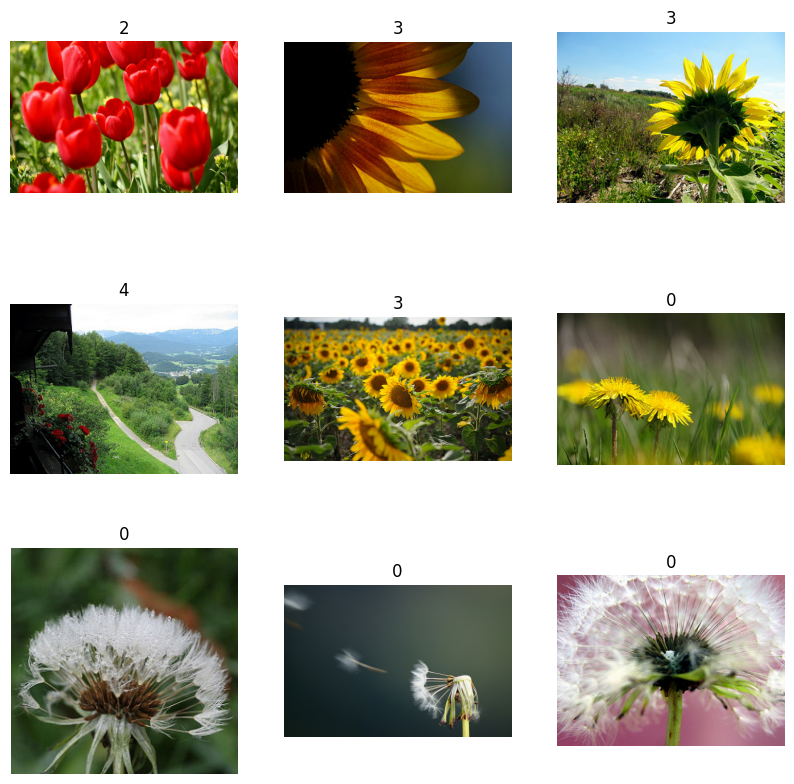

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

Let's get into the data augmentation layers present in `Keras` now. We will visualise the effects of `RandomCrop layer, RandomFlip layer, RandomTranslation layer, RandomRotation layer, RandomZoom layer, RandomContrast layer, RandomBrightness layer` on the images.

### RandomFlip

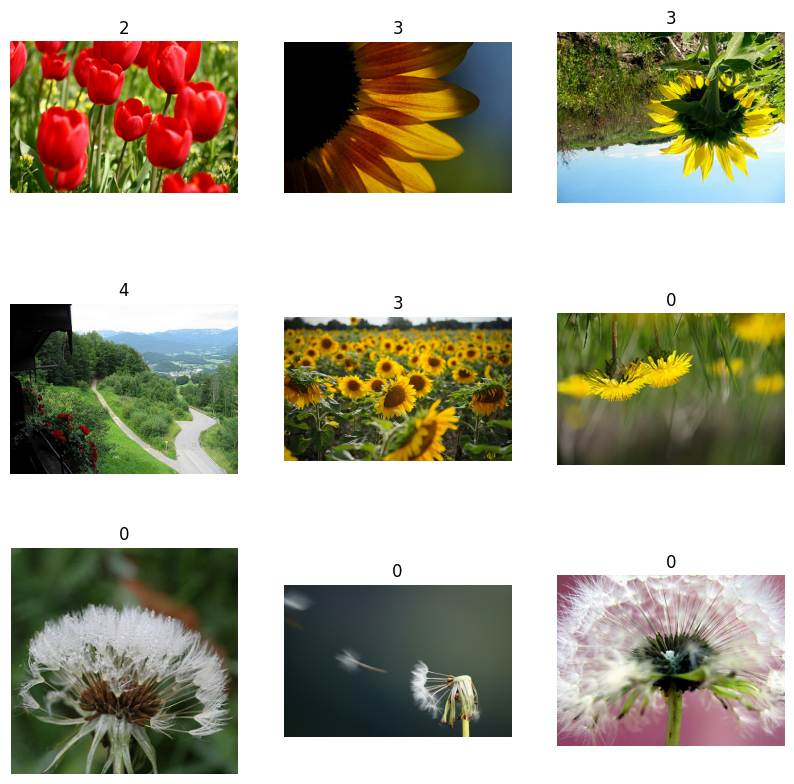

In [29]:
random_flip_layer = layers.RandomFlip("horizontal_and_vertical")
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    flipped_image = random_flip_layer(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(flipped_image.numpy().astype("uint8"))
    plt.title(int(label))
    plt.axis("off")

### RandomCrop

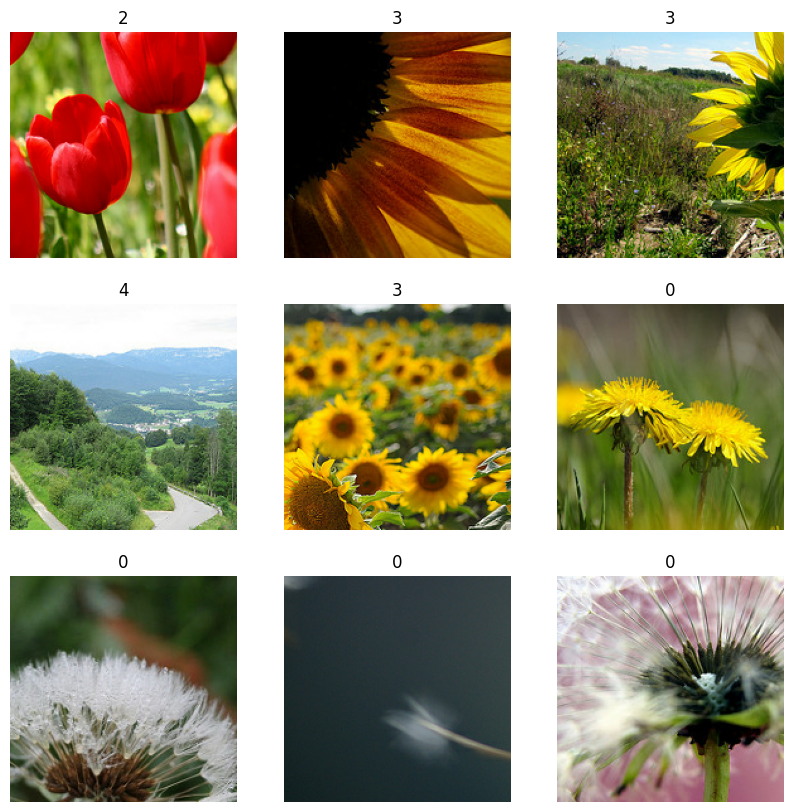

In [31]:
random_crop_layer = layers.RandomCrop(180,180)
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    cropped_image = random_crop_layer(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(cropped_image.numpy().astype("uint8"))
    plt.title(int(label))
    plt.axis("off")

### RandomRotation

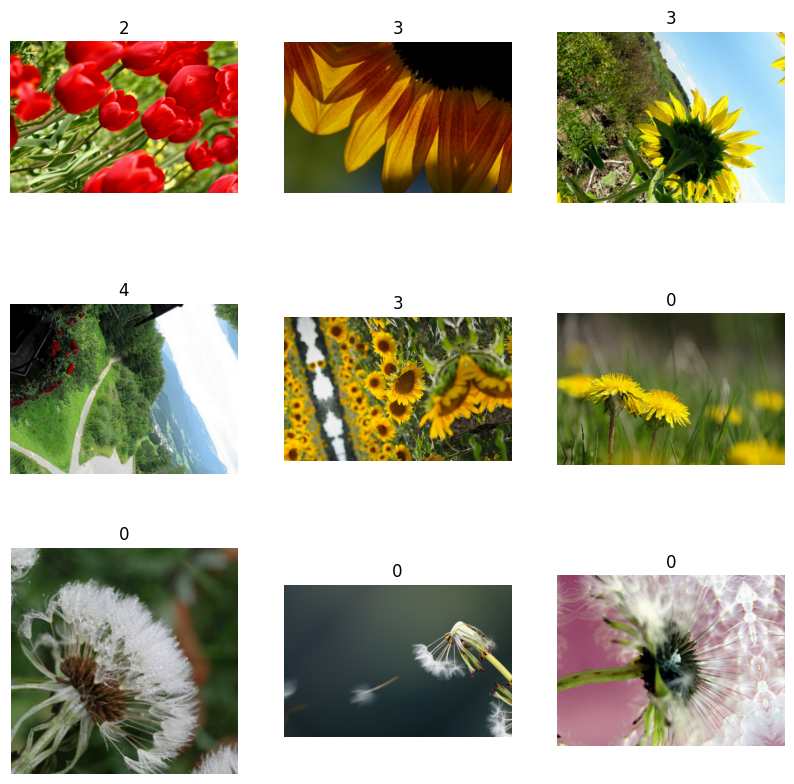

In [32]:
random_rotate_layer = layers.RandomRotation(factor=0.3)
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    rotated_image = random_rotate_layer(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(rotated_image.numpy().astype("uint8"))
    plt.title(int(label))
    plt.axis("off")

### RandomZoom

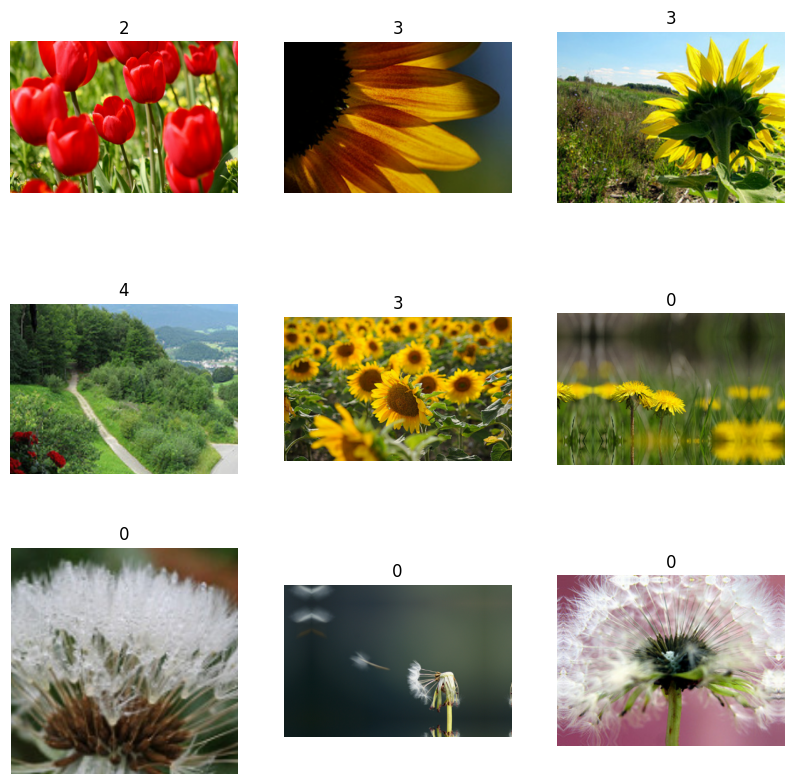

In [34]:
random_zoom_layer = layers.RandomZoom(height_factor=0.5)
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    zoomed_image = random_zoom_layer(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(zoomed_image.numpy().astype("uint8"))
    plt.title(int(label))
    plt.axis("off")

### RandomBrightness

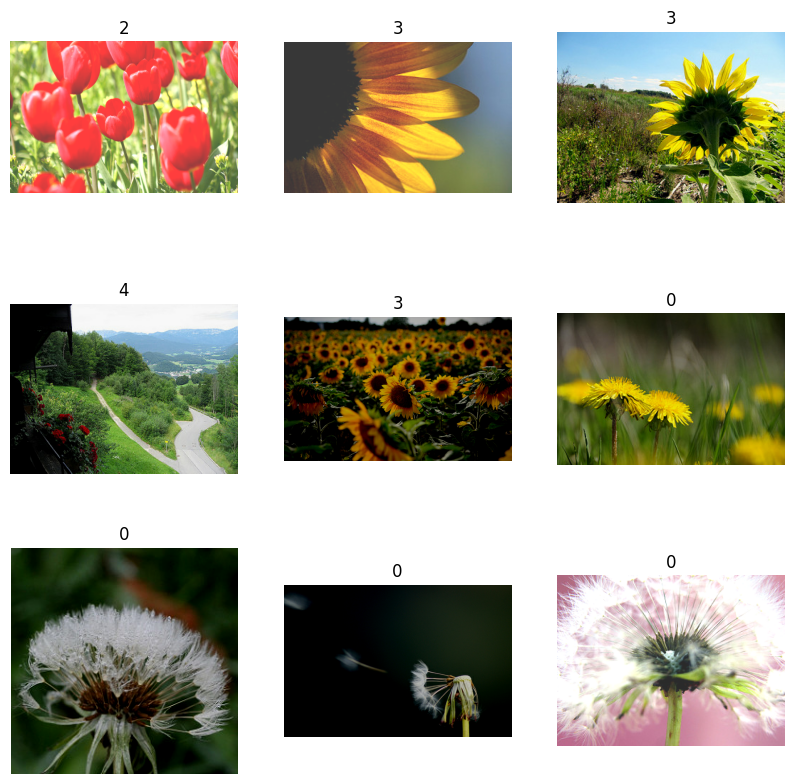

In [35]:
random_brightness_layer = layers.RandomBrightness(factor=0.3)
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    bright_image = random_brightness_layer(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(bright_image.numpy().astype("uint8"))
    plt.title(int(label))
    plt.axis("off")

### RandomContrast

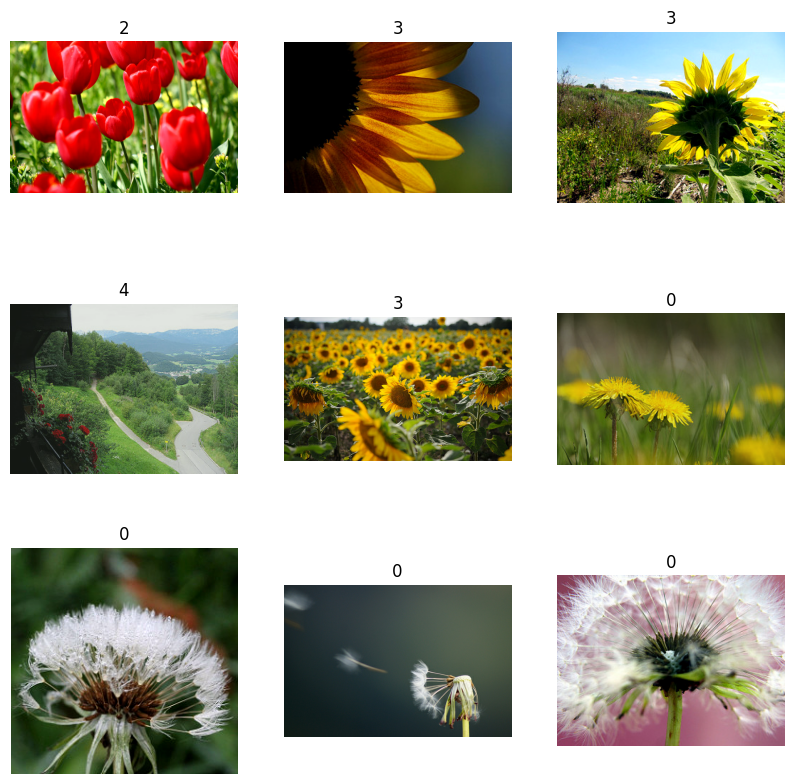

In [36]:
random_contrast_layer = layers.RandomContrast(factor=0.2)
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    contrast_image = random_contrast_layer(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(contrast_image.numpy().astype("uint8"))
    plt.title(int(label))
    plt.axis("off")

### RandomTranslation

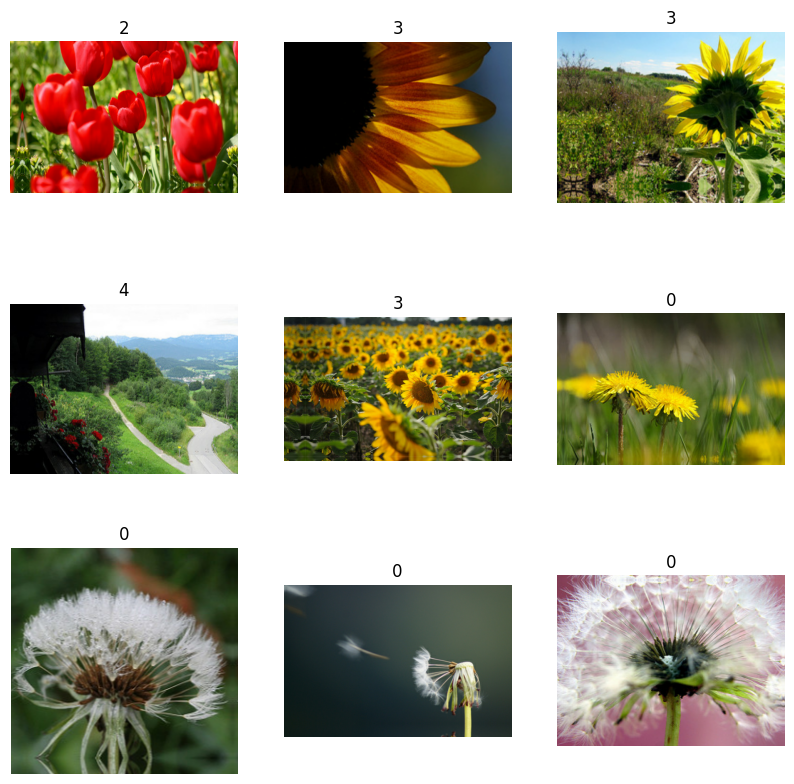

In [41]:
random_translation_layer = layers.RandomTranslation(height_factor=0.1, width_factor=0.1)
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    translated_image = random_translation_layer(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(translated_image.numpy().astype("uint8"))
    plt.title(int(label))
    plt.axis("off")

Now, let's apply some data augmentation layers to our training set.

In [42]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal and vertical"),
    layers.RandomRotation(factor=0.3),
    layers.RandomBrightness(factor=0.2),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [43]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

Here, we resize the images to 180x180 pixels and create batches of 64 images.

In [44]:
train_ds = train_ds.map(lambda x, y: (layers.Resizing(180,180)(x), y))
val_ds = val_ds.map(lambda x, y: (layers.Resizing(180,180)(x), y))
test_ds = test_ds.map(lambda x, y: (layers.Resizing(180,180)(x), y))

In [45]:
train_ds = train_ds.batch(64)
val_ds = val_ds.batch(64)
test_ds = test_ds.batch(64)

Next, we create our model using the `Sequential` class from `Keras`. It consists of four convolutional layers, each followed by a max-pooling layer. The output from the convolutional layers is flattened and passed to a fully connected layer with a softmax activation function for class prediction.

In [2]:
model = keras.Sequential()

model.add(keras.Input(shape=(180,180,3)))

model.add(layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(256, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=5, activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         103,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,140,101 (4.35 MB)

 Trainable params: 1,140,101 (4.35 MB)

 Non-trainable params: 0 (0.00 B)

We compile our model using the `sparse_categorical_crossentropy` loss because our labels are encoded as integers. We use `accuracy` as the metric and train the model for 15 epochs using the `adam` optimizer.

_Note: Use categorical_crossentropy as the loss when your labels are one-hot encoded._

In [47]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.2371 - loss: 25.7404 - val_accuracy: 0.4291 - val_loss: 1.3532
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.3979 - loss: 1.3235 - val_accuracy: 0.5055 - val_loss: 1.2756
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.4735 - loss: 1.2265 - val_accuracy: 0.4982 - val_loss: 1.2694
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4809 - loss: 1.2321 - val_accuracy: 0.4927 - val_loss: 1.1442
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5116 - loss: 1.1936 - val_accuracy: 0.5582 - val_loss: 1.0762
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5331 - loss: 1.1523 - val_accuracy: 0.5673 - val_loss: 1.1315
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5536 - loss: 1.1227 - val_accuracy: 0.5927 - val_loss: 1.0348
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5801 - loss: 1.0709 - val_accuracy: 0.5909 - val_los

Now, we evaluate our model on the test set and display the accuracy and loss.

In [48]:
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 713ms/step - accuracy: 0.7052 - loss: 0.8004
Test Loss: 0.7793617844581604
Test Accuracy: 0.7186932563781738


We have obtained an accuracy of **71.87%** on the test set, an **7%** increase from before. However, we have one final trick in our hat: hyperparameter tuning, which will further enhance our model's performance. In the next notebook, we will selecting the best learning rate and epochs for our model.